In [0]:
import numpy as  np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def informationContent(k, probabilities):
    I = 0
    for prob in probabilities:
        I += -k * prob * math.log2(prob)
    return I

0.5


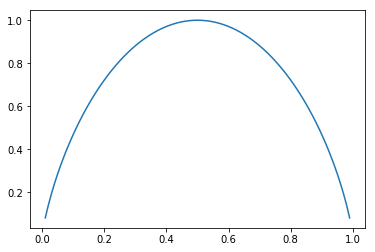

In [0]:
p = np.arange(0.01, 1, 0.01)
infoContent = []
for i in range(len(p)):
    ic = informationContent(1, [p[i], 1-p[i]])
    infoContent.append(ic)
plt.plot(p, infoContent)
plt.savefig('Information Content vs P.png')
print(p[np.argmax(infoContent)])

(0.99, 1.01)

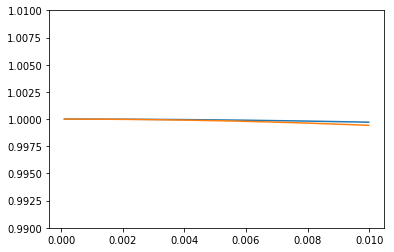

In [0]:
epsilon = np.arange(0.0001, 0.01, 0.00001)
infoContent = []
for i in range(len(epsilon)):
    p = epsilon[i]+0.5
    ic = informationContent(1, [p, 1-p])
    infoContent.append(ic)

plt.plot(epsilon, infoContent)
plt.plot(epsilon, 1 - 4 * epsilon**2/np.log(2))
plt.ylim([1-0.01, 1+0.01])

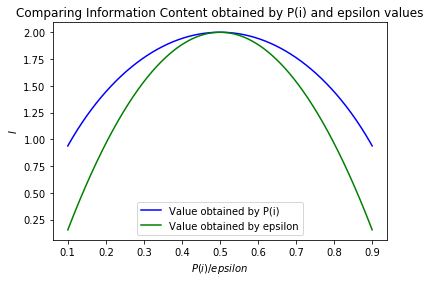

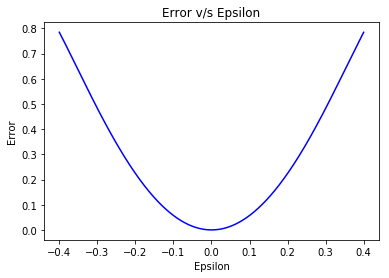

In [0]:
epsilon = np.arange(-0.4,0.4,0.0001)
  
k = 2

I = [(-1*k*((0.5+x)*math.log(0.5+x,2) + (0.5-x)*math.log(0.5-x,2))) for x in epsilon]
  
P = [0.5 + x for x in epsilon]

plt.plot(P,I,color='blue',label="Value obtained by P(i)")
f = [k - 4*k*x*x/math.log(2,math.e) for x in epsilon]
plt.plot(P,f,color='green',label="Value obtained by epsilon")
plt.xlabel('$P(i) / epsilon$')
plt.ylabel('$I$')
plt.legend()
plt.title('Comparing Information Content obtained by P(i) and epsilon values')
plt.savefig('epsilon-original.png')
plt.show()

err = []
for i in range(len(I)):
    err.append(I[i]-f[i])

plt.plot(epsilon,err,color='b')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("Error v/s Epsilon")
plt.show()

In [0]:
ra = (10**1.6)*7*(10**8) 
rb = (10**3.6)*7*(10**8)

G = 6.754 * (10**(-11))
M = 2* (10**30)
n = 2.5
cs = 10000
d = -n*(cs**2)
rho = 10**(-21)
gamma = 7/5
j = n
mdot = (math.pi*(G**2)*(M**2)*rho*j)/(cs**3)
mudot = (mdot * cs**(2*n))/(rho * 4*math.pi)

def f(v,r):    
    c = -G*M/r
    b = n * (((mudot/(v*(r**2))))**(1/n))
    a = (v**2)/2
    return a+b+c+d

epsilon = 10**-10

def bisection(a, b, r):
    c = (a + b)/2
    dist = b - c
    while(dist > epsilon):
        ans_a = f(a, r)
        ans_b = f(b, r)
        ans_c = f(c, r)
        if ans_a * ans_c < 0:
            b = c
        else:
            a = c
        c = (a + b) / 2
        dist = b - c
    return (a + b) / 2

def func_cs(r, v):
    csr = 10 * ((mdot / (4 * math.pi * v * r * r * rho)) ** (0.2))
    return csr

# def func_cs(r,v):
#     print(v/((mdot / (4*math.pi*v*r*r*rho))**(1/5)))
#     csr = 10 * ((mdot / (4*math.pi*v*r*r*rho))**(1/5))
#     return csr

r = np.arange(ra,rb,10000000000)
dv = 5
va = 0.001
vb = 10**5
v = np.arange(va,vb,dv)

ans_v1 = []
ans_v2 = []
ans_r = []

for ri in r:
    flag = 0
    scale_r = math.log10(ri/(7.0*10**8))
    #if scale_r>3.19:
    #     break
    ans_r.append(scale_r)
    print("Value of r " + str(scale_r))
    for vj in v:
        if( (f(vj,ri) * f(vj+dv,ri)) < 0):
            if(flag==0):
                v1 = bisection(vj,vj+dv,ri)
                ans_v1.append(v1/func_cs(ri, v1))
                flag = 1
                print("Value of v1 " + str(ans_v1[len(ans_v1)-1]))
            else:
                v1 = bisection(vj,vj+dv,ri)
                ans_v2.append(v1/func_cs(ri, v1))
                flag=1
                print("Value of v2 " + str(ans_v2[len(ans_v2)-1]))
    print("\n")
len(ans_r) , len(ans_v1) , len(ans_v2)

Value of r 1.6
Value of v1 176.51384019749355
Value of v2 2750.7984317932005


Value of r 1.73316861630799
Value of v1 230.62648624339135
Value of v2 2480.9090485483503


Value of r 1.8349427235335622
Value of v1 281.18832762329896
Value of v2 2281.7677751719275


Value of r 1.9173366948525743
Value of v1 328.7337615575249
Value of v2 2124.926205970246


Value of r 1.9865638239969434
Value of v1 373.67888934274623
Value of v2 1996.1314171503147


Value of r 2.046258202337977
Value of v1 416.3548352844566
Value of v2 1887.2494622480538


Value of r 2.0987302396288374
Value of v1 457.029953435906
Value of v2 1793.2113681947528


Value of r 2.1455404631092936
Value of v1 495.9251284171643
Value of v2 1710.6502187835022


Value of r 2.1877925811789662
Value of v1 533.224618574913
Value of v2 1637.218622795337


Value of r 2.2262960392607
Value of v1 569.0839276578619
Value of v2 1571.2164200184354


Value of r 2.2616621407266693
Value of v1 603.6356400621885
Value of v2 1511.3737224866943


(276, 276, 276)

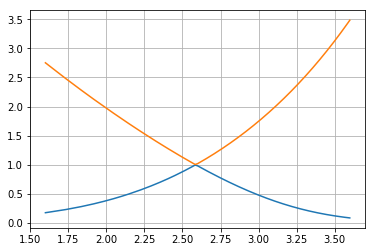

In [0]:
plt.plot(ans_r,[x / 1000 for x in ans_v1])
plt.plot(ans_r,[x / 1000 for x in ans_v2])
plt.grid(True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


Text(0.5, 0, 'R')

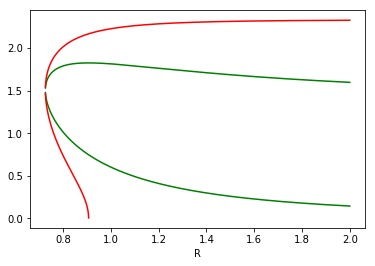

In [0]:
B = 2
R = np.arange(2,0.7254,-0.0001)
vals1 = []
vals2 = []
x1 = []
x2 = []
for r in R:
    coeff = [r**4, 0, -B*(r**4), -4*(r**2), 3]
    roots = np.roots(coeff)
    [y1, y2] = np.real(roots[np.imag(roots)==0])
    x1.append((r**-2)*(y1**-1))
    x2.append((r**-2)*(y2**-1))
    vals1.append(y1)
    vals2.append(y2)

vals1 = np.array(vals1)
vals2 = np.array(vals2)
x1 = np.array(x1)
x2 = np.array(x2)
plt.plot(R, vals1,color='green')
plt.plot(R, vals2,color='green')
plt.plot(R, (x1*((3*x1) - 2))**0.5,color='red')
plt.plot(R, (x2*((3*x2) - 2))**0.5,color='red')
plt.xlabel('R')

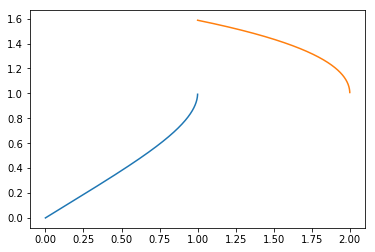

In [0]:
h = []
x = np.arange(0,1,0.0001)
for i in range(len(x)):
    coeff = [1,0,0,-4,3*x[i]]
    ans = np.roots(coeff)
    x1 = np.real(ans[np.imag(ans)==0])
    h.append(x1[1])

plt.plot(x, h)


h = []
x = np.arange(1.0001,2,0.0001)
for i in range(len(x)):
    coeff = [1,0,0,-4,3*x[i]-3]
    ans = np.roots(coeff)
    x1 = np.real(ans[np.imag(ans)==0])
    h.append(x1[0])

plt.plot(x,h)